xmin_plot= 0.0   xmax_plot= 0.94435
ymin_plot= -1.0   ymax_plot= 1.001
wmax1_sub= 105.98400000000001   wnorm1_sub= 10.598400000000002
wmax2_sub= 41.891999999999996   wnorm2_sub= 4.1892


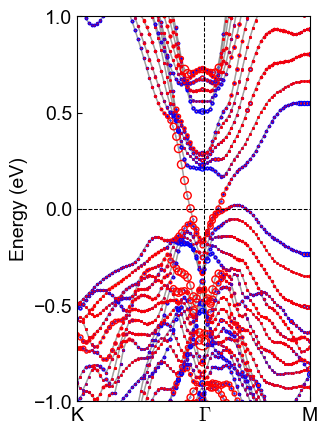

In [602]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
import matplotlib.colors as mcolors

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# Read band.xy file
def read_band(file_path, x_column, y_column, b_column, l_column):
    x_value = []
    y_value = []
    b_value = []
    l_value = []
    with open(file_path, 'r') as file:
        next(file) 
        for line in file:
            data = line.strip().split()
            if len(data) >= max(x_column, y_column, b_column, l_column):
                x_value.append(float(data[x_column - 1]))
                y_value.append(float(data[y_column - 1]))
                b_value.append(int(data[b_column - 1]))
                l_value.append(int(data[l_column - 1]))
    return x_value, y_value, b_value, l_value

def get_band(file_path, x_column, y_column, b_column, l_column):
    x_value, y_value, b_value, l_value = read_band(file_path, x_column, y_column, b_column, l_column)
    istr=[]
    iend=[]
    b_band=[]
    iiband=0
    ii=0
    for i in range(len(b_value)):
        if b_value[i] != iiband:
            ii=ii+1
            iiband=b_value[i]
            b_band.append(iiband)
            istr.append(i)
            iend.append(i)
        else:
            iend[ii-1]=i
    x_band=[]
    y_band=[]
    for i in range(len(istr)):
        iistr=istr[i]
        iiend=iend[i]+1
        x_band.append(x_value[iistr:iiend])
        y_band.append(y_value[iistr:iiend])
    llband=0
    l_band=[]
    for l in range(len(l_value)):
        if b_value[l] == b_value[0] and l_value[l] != llband:
            llband=l_value[l]
            l_band.append(x_value[l])
    l_band.append(x_value[l])
    return x_band, y_band, b_band, l_band

# Read wight.xy file
def read_wight(file_path, x_column, y_column, w_column):
    x_value = []
    y_value = []
    w_value = []
    with open(file_path, 'r') as file:
        next(file) 
        for line in file:
            data = line.strip().split()
            if len(data) >= max(x_column, y_column, w_column):
                x_value.append(float(data[x_column - 1]))
                y_value.append(float(data[y_column - 1]))
                w_value.append(float(data[w_column - 1]))
    return x_value, y_value, w_value

def get_weight(file_path, x_column, y_column, w_column):
    x_weight=[]
    y_weight=[]
    w_weight=[]
    for i in range(len(file_path)): 
        x_value, y_value, w_value = read_data(file_sub[i], x_column, y_column, w_column)
        if i == 0:
            for j in range(len(w_value)):
                x_weight.append(x_value[j])
                y_weight.append(y_value[j])
                w_weight.append(w_value[j])
        else:
            for j in range(len(w)):
                w_weight[j] = w_weight[j] + w_value[j]
    return x_weight, y_weight, w_weight


#MAIN PROGRAM
if __name__ == '__main__':
    
    #working directory
    home = "./6Q/"
    dir = "bandsoc/"
    
    #band.xy
    x_column = 4  # x values
    y_column = 5  # y values
    b_column = 6  # band index
    l_column = 7  # line index
    file_path = home + dir + "band.xy"
    x_plot, y_plot, b_plot, l_plot = get_band(file_path, x_column, y_column, b_column, l_column)

    #set axis
    xmin_plot = np.amin(x_plot)
    xmax_plot = np.amax(x_plot)
    ymin_plot = -1.
    ymax_plot =  1.001
    ystp_plot =  0.5
    print("xmin_plot=",xmin_plot,"  xmax_plot=",xmax_plot)
    print("ymin_plot=",ymin_plot,"  ymax_plot=",ymax_plot)

    #bndatm.xy
    x_column = 1  # x values
    y_column = 2  # y values
    w_column = 4  # w value
    file_sub=[]
    file_sub.append( home + dir + "bndatm_a1s1.xy" )
    file_sub.append( home + dir + "bndatm_a1s2.xy" )
    file_sub.append( home + dir + "bndatm_a2s1.xy" )
    file_sub.append( home + dir + "bndatm_a2s2.xy" )
    file_sub.append( home + dir + "bndatm_a3s1.xy" )
    file_sub.append( home + dir + "bndatm_a3s2.xy" )
    file_sub.append( home + dir + "bndatm_a4s1.xy" )
    file_sub.append( home + dir + "bndatm_a4s2.xy" )
    file_sub.append( home + dir + "bndatm_a5s1.xy" )
    file_sub.append( home + dir + "bndatm_a5s2.xy" )
    x1_sub, y1_sub, w1_sub = get_weight(file_sub, x_column, y_column, w_column)
    file_sub=[]
    file_sub.append( home + dir + "bndatm_a11s1.xy" )
    file_sub.append( home + dir + "bndatm_a11s2.xy" )
    file_sub.append( home + dir + "bndatm_a12s1.xy" )
    file_sub.append( home + dir + "bndatm_a12s2.xy" )
    file_sub.append( home + dir + "bndatm_a13s1.xy" )
    file_sub.append( home + dir + "bndatm_a13s2.xy" )
    file_sub.append( home + dir + "bndatm_a14s1.xy" )
    file_sub.append( home + dir + "bndatm_a14s2.xy" )
    file_sub.append( home + dir + "bndatm_a15s1.xy" )
    file_sub.append( home + dir + "bndatm_a15s2.xy" )
    x2_sub, y2_sub, w2_sub = get_weight(file_sub, x_column, y_column, w_column)

    #set axis
    wnorm=0.1
    wmax1_sub = np.amax(w1_sub)
    wmax2_sub = np.amax(w2_sub)
    print("wmax1_sub=",wmax1_sub,"  wnorm1_sub=",wmax1_sub*wnorm)
    print("wmax2_sub=",wmax2_sub,"  wnorm2_sub=",wmax2_sub*wnorm)

    #FIGURE
    #set figure
    fig = plt.figure(dpi=100,figsize=(3,5))

    #plot band
    for i in range(len(b_plot)):
        x=x_plot[0:][i]
        y=y_plot[0:][i]
        plt.plot(x, y, "-", linewidth=1, color="grey", alpha=0.5)

    #plot wight
    for i in range(len(w_sub)):
        plt.plot(x2_sub[i],y2_sub[i],markersize=w2_sub[i]*wnorm,color="blue",linewidth=1,marker="o",markerfacecolor="none",alpha=1)
        plt.plot(x1_sub[i],y1_sub[i],markersize=w1_sub[i]*wnorm,color="red",linewidth=1,marker="o",markerfacecolor="none",alpha=1)
            
    #Set axis
    plt.xlim(xmin_plot, xmax_plot)
    plt.ylim(ymin_plot, ymax_plot)
    plt.xticks(l_plot,["K","$\Gamma$","M"],fontsize=14)
    plt.yticks(np.arange(ymin_plot, ymax_plot, ystp_plot),fontsize=14)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.75) 
    plt.axvline(l_plot[1:len(l_plot)-1], color='black', linestyle='--', linewidth=0.75)
    #plt.xlabel("k-direction", fontsize=14)
    plt.ylabel("Energy (eV)", fontsize=14)
   
    #save/draw figure
    plt.savefig('fig.svg',bbox_inches="tight",transparent=True)
    plt.show()
    plt.clf()
    plt.close()

